ENSI : Restauration d'images et considérations numériques  - 2024
Pr Slim MHIRI

# Atelier 1 : Méthodes variationnelles pour l'imagerie

## 1. Téléchargements des images



## 2. Gestion des images
Dans ce TP nous allons (entre autres) travailler avec l'image de Lena
<img src="lena.png" alt="Lena" width="128" height="128"/>

### Chargement d'une image

In [1]:
import matplotlib.pyplot as plt
from scipy import ndimage as ndim
#on charge l'image de lena à l'aide de la fonction imread de la bibliothèque ndimage de scipy
y =plt.imread("/content/lena.png")

#on ne garde que la première composante car niveau de gris
y=y[:,:,0];
#l'image est de type int, on la cast en float pour pouvoir faire des calculs
y=y.astype(float)
#la taille de l'image peut s'obtenir à l'aide de l'attribut shape
[n1,n2]=y.shape


### Affichage d'une image

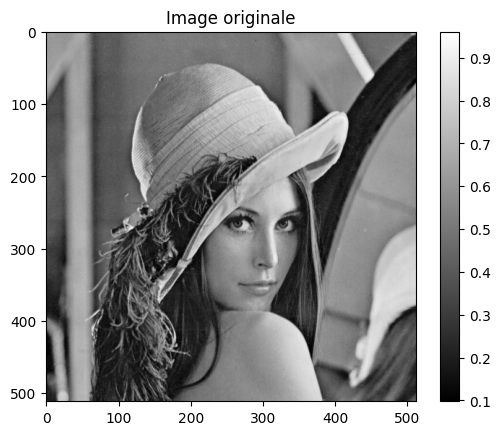

In [2]:
import matplotlib.pyplot as plt
#on affiche l'image à l'aide de la fonction imshow de la bibliothèque pyplot de matplotlib
#on donne un numero à la figure
plt.figure(1)
#on l'affiche en niveau de gris
plt.imshow(y, cmap="gray")
#on affiche la colorbar associée
plt.colorbar()
#on lui donne un titre
plt.title('Image originale')
#on affiche tout cela sur la figure 1
plt.show()

## 3. Problème direct
On s'intéresse premièrement au problème direct, c'est à dire, comment générer des observations $z$ à partir de données originales $y$.
On rappelle que le problème d'observation s'écrit
\begin{equation}
z=\mathcal{D}_\alpha(Ly)
\end{equation}
où
<ul>
<li> $z$ : observations</li>
<li> $y$ : données originales</li>
<li> $L$ : opérateur linéaire (un opérateur de convolution par exemple)</li>
<li> $\mathcal{D}_\alpha$ : perturbation de paramètre $\alpha$ (un bruit).</li>
</ul>

### 3.1. Le problème de convolution
On considère dans un premier temps que l'opérateur linéaire $L$ modélise une convolution.
\begin{equation}
z=\mathcal{D}_\alpha(h\star y)
\end{equation}
où $h$ est le noyau de convolution.

#### Rappels
On rappelle que le filtrage de l'image $g$ par le noyau $h$ est la suite $(w_{n_1,n_2})$ définie par
\begin{equation}
w_{n_1,n_2}=\sum\limits_{m_1=0}^{N_1-1}\sum\limits_{m_2=0}^{N_2-1}h_{m_1,m_2}g_{n_1-m_1,n_2-m_2}=(h\star g)_{n_1,n_2}
\end{equation}
où les indices $n_i-m_i$ sont définis modulo $N_i$ et où $g$ et $h$ sont de taille $N_1\times N_2$.

On note $\hat{h}=(\hat{h}_{k_1,k_2})$ et $\hat{g}=(\hat{g}_{k_1,k_2})$ les transformées de Fourier finies de $h=(h_{n_1,n_2})$ et $g=(g_{n_1,n_2})$.

Alors $w=(w_{n_1,n_2})$ est une suite finie et sa transformée de Fourier finie notée $\hat{w}=(\hat{w}_{k_1,k_2})$ vérifie

\begin{equation}
\hat{w}_{k_1,k_2}=\hat{h}_{k_1,k_2}\hat{g}_{k_1,k_2},\ \forall k_i=0,..,N_i-1.
\end{equation}

Avec Python, pour obtenir $\hat{w}$, il nous suffit donc de construire le vecteur dont chaque coordonnée est le produit des coordonnées correspondantes de $\hat{h}$ et $\hat{g}$.

### Noyaux de convolution
On considère ici deux types de noyau de convolution. Le noyau gaussien et le noyau uniforme. La construction de ces noyaux se fait grâce au deux fonctions fournies ci-après prenant chacune deux arguments : $n$ taille (en pixel) du noyau (i.e. le noyau obtenu sera de taille $n\times n$) et $s$ l'étalement du noyau.

In [3]:
#pour cela nous avons besoin de la bibliothèque numpy
import numpy as np

In [4]:
def gaussian(n,s):
    x = np.concatenate((np.arange(0,n/2,1),np.arange(-n/2,0,1)))
    [Y,X] = np.meshgrid(x,x)
    h = np.exp((-X**2-Y**2)/(2*s**2))
    h = h/np.sum(h)
    return h

In [5]:
def uniform(n,s):
    h=np.zeros((n,n))
    h[0:int(np.ceil(s/2)),0:int(np.ceil(s/2))] = 1
    h[n-int(np.floor(s/2)):n,0:int(np.ceil(s/2))]=1
    h[0:int(np.ceil(s/2)),n-int(np.floor(s/2)):n]=1
    h[n-int(np.floor(s/2)):n,n-int(np.floor(s/2)):n]=1
    h = h/np.sum(h)
    return h

### Exercice 1 : génération de noyaux
Construire un noyau gaussien de la taille de l'image de Lena chargée en section 3 et d'étalement $s=1$.<br />
Construire un noyau uniforme de la taille de l'image de Lena chargée en section 3 et d'étalement $s=5$.<br /> Visualiser les filtres ainsi que les modules de leur réponses fréquentielles. (Pour voir le filtre on zoomera sur les indices de 0 à 20 par exemple).<br>

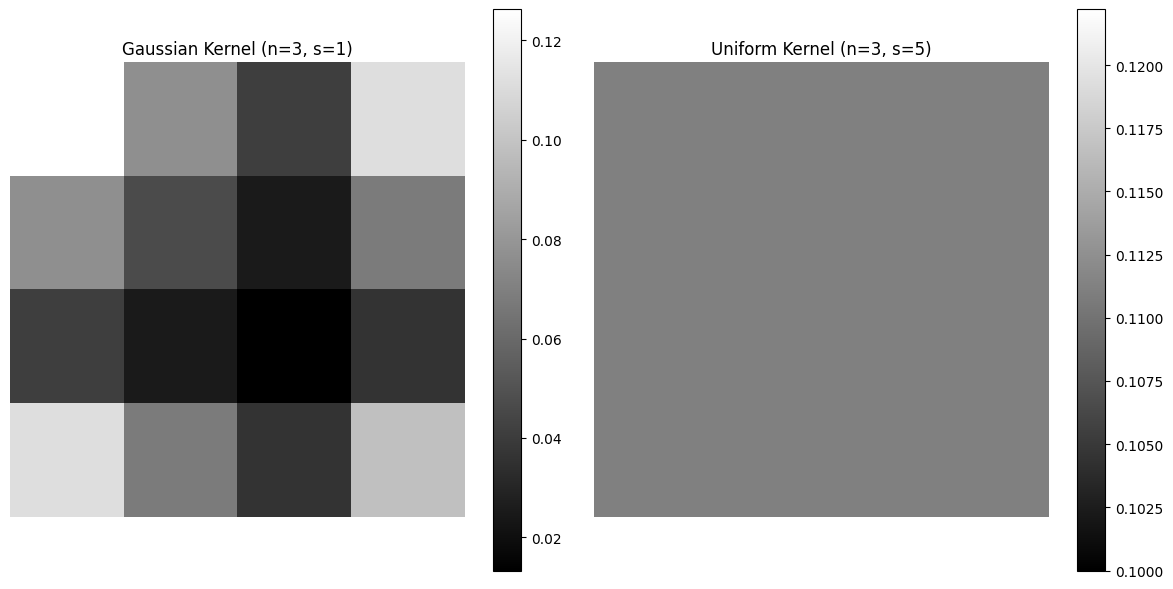

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Gaussian kernel function
def gaussian(n, s):
    x = np.concatenate((np.arange(0, n/2, 1), np.arange(-n/2, 0, 1)))
    [Y, X] = np.meshgrid(x, x)
    h = np.exp((-X**2 - Y**2) / (2 * s**2))
    h = h / np.sum(h)  # Normalize the kernel
    return h

# Uniform kernel function
def uniform(n, s):
    h = np.zeros((n, n))
    h[0:int(np.ceil(s/2)), 0:int(np.ceil(s/2))] = 1
    h[n-int(np.floor(s/2)):n, 0:int(np.ceil(s/2))] = 1
    h[0:int(np.ceil(s/2)), n-int(np.floor(s/2)):n] = 1
    h[n-int(np.floor(s/2)):n, n-int(np.floor(s/2)):n] = 1
    h = h / np.sum(h)  # Normalize the kernel
    return h

# Parameters for the kernels
n = 3  # Size of the kernel (you can change this for larger or smaller kernels)
s_gaussian = 1  # Standard deviation for Gaussian kernel
s_uniform = 5  # Size for uniform kernel

# Generate kernels
gaussian_kernel = gaussian(n, s_gaussian)
uniform_kernel = uniform(n, s_uniform)

# Plot the kernels
plt.figure(figsize=(12, 6))

# Plot Gaussian kernel
plt.subplot(1, 2, 1)
plt.title('Gaussian Kernel (n={}, s={})'.format(n, s_gaussian))
plt.imshow(gaussian_kernel, cmap='gray')
plt.colorbar()
plt.axis('off')

# Plot Uniform kernel
plt.subplot(1, 2, 2)
plt.title('Uniform Kernel (n={}, s={})'.format(n, s_uniform))
plt.imshow(uniform_kernel, cmap='gray')
plt.colorbar()
plt.axis('off')

plt.tight_layout()
plt.show()

### Exercice 2 : dégradation d'une image
Ecrire une fonction degrad_imag qui prend en entrée une image $y$, un noyau de convolution $h$, un paramètre $\alpha$ et un type de dégradation $\mathcal{D}$ et qui renvoie en sortie une image dégradée par un flou de noyau $h$ et une perturbation $\mathcal{D}_\alpha$ qui pourra être
<ol>
<li> un bruit additif gaussien de variance $\alpha=\sigma^2$; </li>
<li> un bruit Poissonien de paramètre d'échelle $\alpha>0$. </li>
<li> un bruit de mouvement . </li>
<li> un bruit focus. </li>
</ol>

In [7]:
import numpy as np
import cv2
from scipy.ndimage import convolve
import matplotlib.pyplot as plt

# Defining the filters as functions
def defocus(size):
    if size % 2 == 0:
        raise ValueError("Size must be odd")

    F = np.zeros((size, size))
    X = np.arange(1, size + 1) - (size + 1) / 2
    rayoncar = (size - 1) * (size - 1) / 4

    for i in X:
        for j in X:
            F[int(i + (size + 1) / 2 - 1), int(j + (size + 1) / 2 - 1)] = ((i * i + j * j) <= rayoncar)

    return F / np.sum(F)

def gauss(size):
    if size % 2 == 0:
        raise ValueError("Size must be odd")

    F = np.zeros((size, size))
    X = np.arange(1, size + 1) - (size + 1) / 2
    et = size / 4

    for i in X:
        for j in X:
            F[int(i + (size + 1) / 2 - 1), int(j + (size + 1) / 2 - 1)] = np.exp(-(i * i + j * j) / (2 * et * et))

    return F / np.sum(F)

def bouge(size):
    if size % 2 == 0:
        raise ValueError("Size must be odd")

    F = np.zeros((size, size))
    F[int((size + 1) / 2 - 1), :] = 1
    return F / np.sum(F)

# Function to add Gaussian noise
def add_gaussian_noise(image, alpha):
    mean = 0
    sigma = np.sqrt(alpha)  # alpha = variance (σ²), donc σ = sqrt(alpha)
    gaussian_noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = image + gaussian_noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

# Function to add Poisson noise
def add_poisson_noise(image, alpha):
    noisy_image = np.random.poisson(image * alpha) / float(alpha)
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

# Function for motion blur
def motion_blur(image, kernel_size):
    kernel_motion = bouge(kernel_size)  # Using the bouge function for motion blur kernel
    return convolve(image, kernel_motion)

# Function for focus blur
def focus_blur(image, kernel_size, sigma):
    kernel_focus = gauss(kernel_size)  # Using the gauss function for focus blur kernel
    return convolve(image, kernel_focus)

# Main degradation function
def degrad_imag(y, h, alpha, degradation_type=None):
    image_flou = convolve(y, h)

    if degradation_type == 'gaussian':
        bruit = np.random.normal(0, np.sqrt(alpha), y.shape)
        image_dégradée = image_flou + bruit

    elif degradation_type == 'poisson':
        bruit_poissonien = add_poisson_noise(image_flou, alpha)
        image_dégradée = image_flou + bruit_poissonien

    elif degradation_type == 'mouvement':
        image_dégradée = motion_blur(image_flou, int(alpha))  # Kernel size based on alpha

    elif degradation_type == 'focus':
        # Ensure alpha is odd for the Gaussian kernel
        if int(alpha) % 2 == 0:
            alpha += 1
        kernel_focus = gauss(int(alpha))  # Use the gauss function for the focus kernel
        image_dégradée = focus_blur(image_flou, int(alpha), 1)

    elif degradation_type is None:
        image_dégradée = image_flou
        return image_dégradée  # Return the blurred image without any degradation

    else:
        raise ValueError("Type de dégradation non reconnu.")

    image_dégradée = np.clip(image_dégradée, 0, 255)
    return image_dégradée

### Exercice 3 : génération d'images dégradées
Utiliser la fonction degrad_imag définie précédemment et générer
<ul>
<li>une image $zb$ telle que $zb$ est la version dégradée de l'image de Lena où l'opérateur linéaire $L$ correspond au noyau gaussien défini dans l'exercice 1 et sans bruit.</li>
<li>une image $zg$ telle que $zg$ est la version dégradée de l'image de Lena où l'opérateur linéaire $L$ correspond au noyau gaussien défini dans l'exercice 1 et le bruit est un bruit additif gaussien de variance $100$.</li>
<li>une image $zf$ telle que $zf$ est la version dégradée de l'image de Lena où l'opérateur linéaire $L$ correspond au noyau blur floue de mouvement .</li>
<li>une image $zz$ telle que $zz$ est la version dégradée de l'image de Lena où l'opérateur linéaire $L$ correspond au noyau focus .</li>
</ul>
</br>
Afficher les images dégradées ainsi générées.

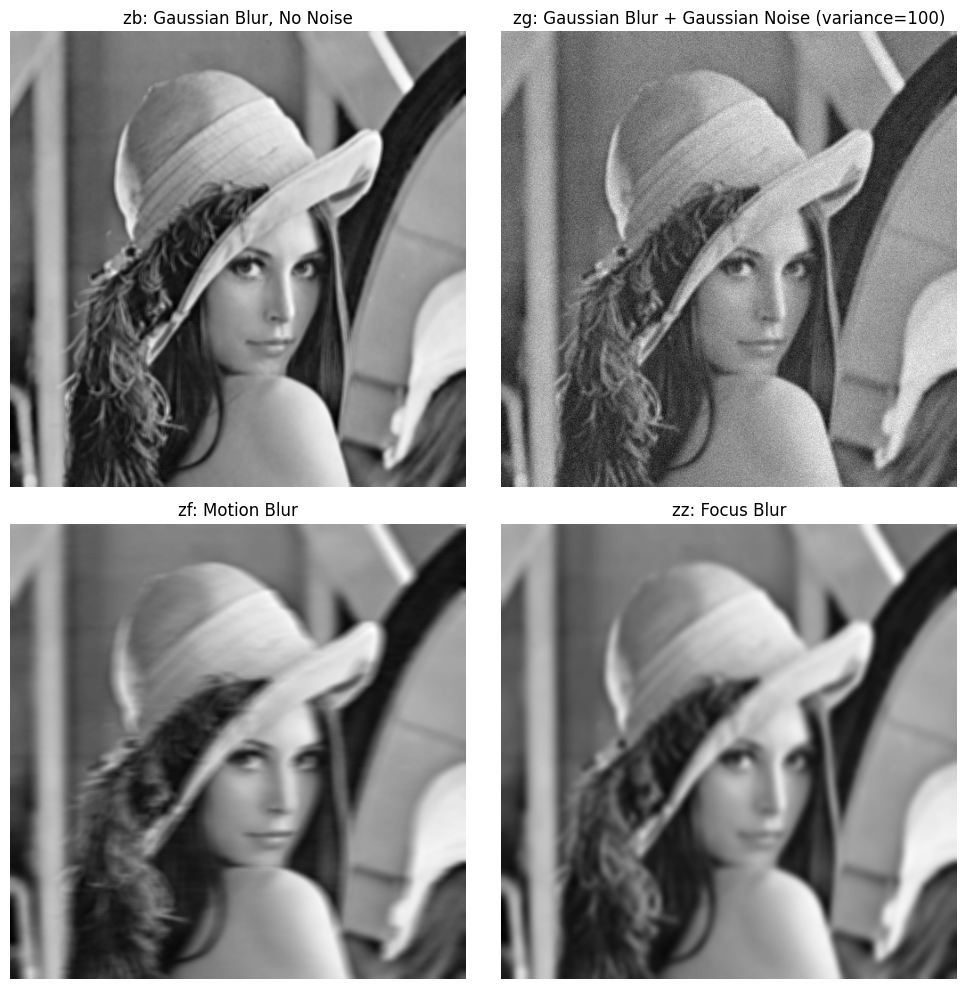

In [8]:
# Charger une image en niveaux de gris
image = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

# Créer les noyau de flou gaussien (et uniforme)
gaussian_kernel = gaussian(n, s_gaussian)
uniform_kernel = uniform(n, s_uniform)

# Générer les images dégradées
zb = degrad_imag(image, gaussian_kernel, alpha=100, degradation_type=None)  # Pas de bruit
zg = degrad_imag(image, gaussian_kernel, alpha=100, degradation_type='gaussian')  # Bruit gaussien
zf = degrad_imag(image, gaussian_kernel, alpha=15, degradation_type='mouvement')  # Flou de mouvement
zz = degrad_imag(image, gaussian_kernel, alpha=13, degradation_type='focus')  # Flou de focus

# Affichage des images
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(zb, cmap='gray')
axs[0, 0].set_title('zb: Gaussian Blur, No Noise')
axs[0, 0].axis('off')

axs[0, 1].imshow(zg, cmap='gray')
axs[0, 1].set_title('zg: Gaussian Blur + Gaussian Noise (variance=100)')
axs[0, 1].axis('off')

axs[1, 0].imshow(zf, cmap='gray')
axs[1, 0].set_title('zf: Motion Blur')
axs[1, 0].axis('off')

axs[1, 1].imshow(zz, cmap='gray')
axs[1, 1].set_title('zz: Focus Blur')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

### 3.2 Mesures de qualité
Pour comparer les performances des algorithmes de restauration on utilisera le SNR (Signal to noise ratio). Si $\tilde{y}$ est le signal restauré et $y$ le signal original non bruité

\begin{equation}
SNR(y,\tilde{y})=10\log_{10}\left(\frac{\parallel y\parallel_2^2}{\parallel y-\tilde{y}\parallel_2^2}\right) \qquad \text{où} \quad \parallel y\parallel_2^2=\sum\limits_{n_1=0}^{N-1}\sum\limits_{n_2=0}^{N-1} |y_{n_1,n_2}|^2.
\end{equation}

On utilisera aussi le PSNR (Peak Signal to noise ratio).

\begin{equation}
PSNR(y,\tilde{y})=10\log_{10}\left(\frac{255^2}{\parallel y-\tilde{y}\parallel_2^2}\right)
\end{equation}

### Exercice 4 : mesures de qualité

1 Fonction SNR :
Ecrire une fonction SNR qui prend en argument 2 images $y$ (l'image originale) et $\tilde{y}$ (l'image restaurée) et qui calcule le SNR entre ces deux images.

2 Fonction PSNR :
Ecrire une fonction PSNR qui prend en argument 2 images $y$ (l'image originale) et $\tilde{y}$ (l'image restaurée) et qui calcule le PSNR entre ces deux images.

In [9]:
def snr(x,xref):
    s = 10*np.log10(np.mean(xref**2)/np.mean((xref-x)**2))
    return s

def psnr(x,xref):
    s = 10*np.log10(255**2/np.mean((xref-x)**2))
    return s

Remarque : Dans le cas où le SNR (ou le PSNR) est calculé entre l'image originale et l'image bruitée ($\tilde{y}$ correspond donc à l'image dégradée $z$ ici), on parle de SNR (ou PSNR) initial.

### Exercice 5 : calculs du SNR et PSNR initiaux
Calculer le SNR et le PSNR initiaux entre l'image originale de Lena et ses versions dégradées $zb$ et $zg$ obtenues à l'exercice 2. Vérifier que l'on obtient environ $SNR(y,zb)=27.11$ dB et $PSNR(y,zb)=32.77$ dB pour $zb$ et  $SNR(y,zg)=21.18$ dB et $PSNR(y,zg)=26.84$ dB pour $zg$.
Calculer le SNR et le PSNR pour $zf$ et pour $zz$

In [10]:
# Charger l'image originale de Lena
y = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)



# Supposons que ces images dégradées ont déjà été générées :
#kernel = gaussian_kernel
#zb = degrad_imag(image, gaussian_kernel, alpha=0, degradation_type=None)  # Pas de bruit
#zg = degrad_imag(image, gaussian_kernel, alpha=100, degradation_type='gaussian')  # Bruit gaussien
#zf = degrad_imag(image, gaussian_kernel, alpha=15, degradation_type='mouvement')  # Flou de mouvement
#zz = degrad_imag(image, gaussian_kernel, alpha=25, degradation_type='focus')  # Flou de focus


# Calculer les SNR et PSNR initiaux
snr_zb = snr(y, zb)
psnr_zb = psnr(y, zb)

snr_zg = snr(y, zg)
psnr_zg = psnr(y, zg)

snr_zf = snr(y, zf)
psnr_zf = psnr(y, zf)

snr_zz = snr(y, zz)
psnr_zz = psnr(y, zz)

# Afficher les résultats
print(f"SNR(y, zb): {snr_zb:.2f} dB, PSNR(y, zb): {psnr_zb:.2f} dB")
print(f"SNR(y, zg): {snr_zg:.2f} dB, PSNR(y, zg): {psnr_zg:.2f} dB")
print(f"SNR(y, zf): {snr_zf:.2f} dB, PSNR(y, zf): {psnr_zf:.2f} dB")
print(f"SNR(y, zz): {snr_zz:.2f} dB, PSNR(y, zz): {psnr_zz:.2f} dB")

SNR(y, zb): 5.27 dB, PSNR(y, zb): 33.21 dB
SNR(y, zg): 19.49 dB, PSNR(y, zg): 25.18 dB
SNR(y, zf): 3.24 dB, PSNR(y, zf): 31.23 dB
SNR(y, zz): 3.77 dB, PSNR(y, zz): 31.77 dB


## 4. Méthodes de base pour la déconvolution
On est donc dans le cas particulier où
\begin{equation}
z=\mathcal{D}_\alpha(h\star y)
\end{equation}
où
<ul>
<li> $z$ : observations</li>
<li> $y$ : données originales</li>
<li> $h$ : noyau de l'opérateur de convolution</li>
<li> $\mathcal{D}_\alpha$ : perturbation de paramètre $\alpha$ (un bruit)</li>
</ul>

### 4.1. Méthode d'inversion

On se propose ici d'implémenter la méthode d'inversion. Cette méthode est très simple et consiste à appliquer le filtre inverse aux observations. Cela équivaut, dans le domaine de Fourier, à diviser terme à terme l'observation par la réponse fréquentielle du filtre de dégradation.

### Exercice 6 : inversion directe

1. Fonction inversion :
Créez une fonction inversion_flou qui prend en entrée l'image observée $z$, la réponse impulsionnelle d'un filtre $h$ et donne en sortie l'image estimée en faisant l'inversion directe en Fourier comme expliqué ci-dessus.

2. Application :
Appliquer cette fonction aux observations $zg$ et $zb$ de l'exercice 3. Afficher les images et calculer les performances numériques c'est-à-dire le SNR et le PSNR.

In [11]:
# Fonction pour la déconvolution par inversion directe
def inversion_flou(z, h):
    # Calculer la transformée de Fourier de l'image observée z
    Z = np.fft.fft2(z)
    # Calculer la transformée de Fourier du noyau h
    H = np.fft.fft2(h, s=z.shape)  # S'assurer que H a la même taille que Z

    # Éviter la division par zéro en ajoutant une petite valeur epsilon
    epsilon = 1e-10
    estimated_y_freq = Z / (H + epsilon)

    # Revenir à l'espace des images
    estimated_y = np.fft.ifft2(estimated_y_freq)

    return np.abs(estimated_y)  # Retourner l'image estimée en prenant la partie réelle

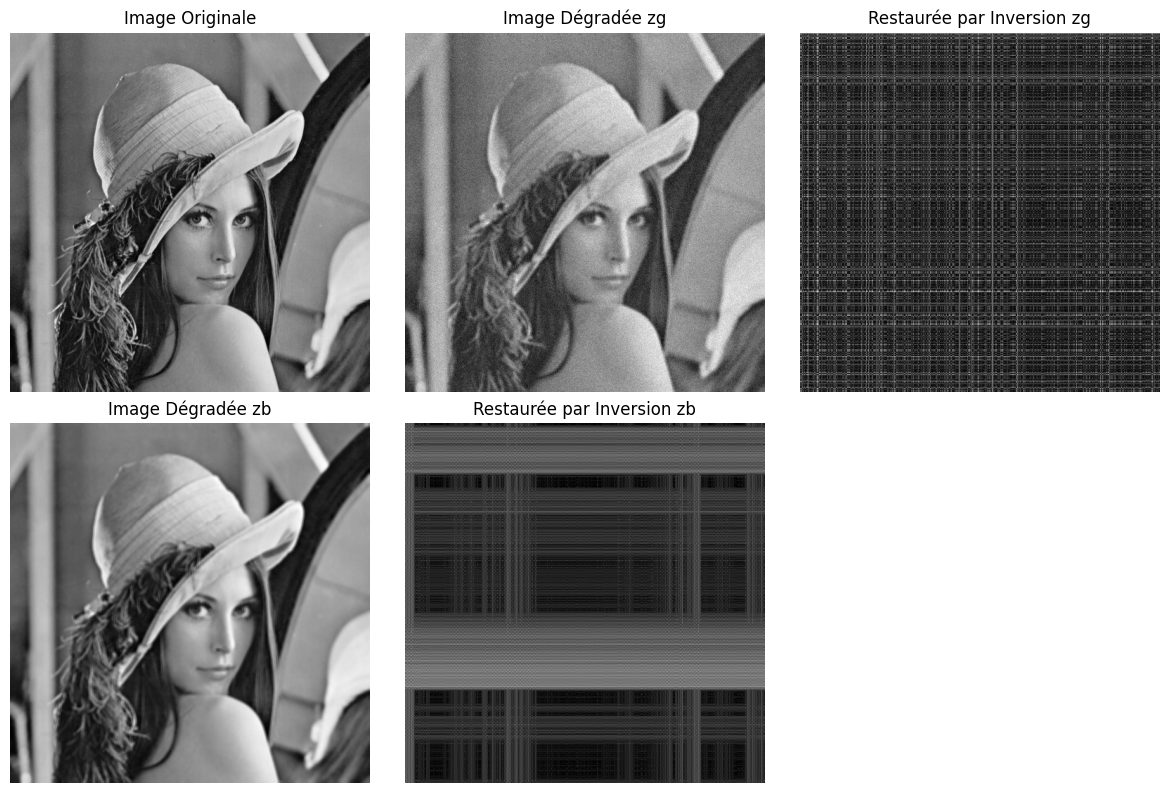

SNR(estimated_y, zg): 0.00 dB, PSNR(estimated_y, zg): -148.08 dB
SNR(estimated_y, zb): 0.00 dB, PSNR(estimated_y, zb): -131.14 dB


In [12]:
# Charger l'image originale de Lena
original_image = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

# Générer les images dégradées (assurez-vous que ces variables sont définies)
# zb = degrad_imag(original_image, kernel, alpha=850, degradation_type='gaussian')
# zg = degrad_imag(original_image, kernel, alpha=100, degradation_type='gaussian')

# Définir un noyau h pour la déconvolution (exemple d'un noyau gaussien)
kernel_size = 512
sigma = 1
x = np.linspace(-kernel_size//2, kernel_size//2, kernel_size)
y = np.linspace(-kernel_size//2, kernel_size//2, kernel_size)
x, y = np.meshgrid(x, y)
h = np.exp(-(x**2 + y**2) / (2*sigma**2))
h /= h.sum()  # Normaliser le noyau


# Appliquer la méthode d'inversion directe sur zg et zb
estimated_zg = inversion_flou(zg, h)
estimated_zb = inversion_flou(zb, h)





# Calculer SNR et PSNR pour les images estimées
snr_estimated_zg = snr(original_image, estimated_zg)
psnr_estimated_zg = psnr(original_image, estimated_zg)

snr_estimated_zb = snr(original_image, estimated_zb)
psnr_estimated_zb = psnr(original_image, estimated_zb)

# Afficher les résultats
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title("Image Originale")
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Image Dégradée zg")
plt.imshow(zg, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Restaurée par Inversion zg")
plt.imshow(estimated_zg, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title("Image Dégradée zb")
plt.imshow(zb, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title("Restaurée par Inversion zb")
plt.imshow(estimated_zb, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Afficher les performances
print(f"SNR(estimated_y, zg): {snr_estimated_zg:.2f} dB, PSNR(estimated_y, zg): {psnr_estimated_zg:.2f} dB")
print(f"SNR(estimated_y, zb): {snr_estimated_zb:.2f} dB, PSNR(estimated_y, zb): {psnr_estimated_zb:.2f} dB")

### 4.2. Filtre de Wiener dans le cas d'un bruit additif Gaussien
On suppose donc à présent que $\mathcal{D}_\alpha$ modélise un bruit additif gaussien de variance $\alpha=\sigma^2$.
On se restreint donc au cas où
\begin{equation}
z=(h\star y) + b
\end{equation}
avec
<ul>
<li> $z$ : observations </li>
<li> $y$ : données originales </li>
<li> $h$ : noyau de l'opérateur de convolution</li>
<li> $b$ : bruit additif Gaussien de variance $\sigma^2$</li>
</ul>

#### Filtre de Wiener pour la déconvolution
<em>
La formule qui donne le filtre de restauration de Wiener dans le cas de la déconvolution est
$$\hat{g}(\omega)=\frac{\overline{\hat{h}(\omega)}\mathcal{S}_x(\omega)}{|\hat{h}(\omega)|^2\mathcal{S}_x(\omega)+\sigma^2} $$
où $\hat{h}$ est la fonction de transfert du filtre de dégradation et $\mathcal{S}_x$ est la densité spectrale du processus aléatoire $x$ dont l'image de départ $y$ est une réalisation.


Remarque: ici on considère que l'image de départ $y$ est une réalisation d'un processus aléatoire $x$ sous jacent. Pour obtenir $\mathcal{S}_x$ on utilise la méthode du périodogramme sur une seule réalisation.

### Exercice 7 : Filtre de Wiener en déconvolution

1. Fonction filtre de Wiener:
Créez une fonction filtredeconvwiener qui prend en entrée la réponse impulsionnelle d'un filtre $h$, une variance $\sigma^2$ et une densité spectrale $\mathcal{S}_x$, et ressort la fonction de transfert du filtre de Wiener pour la restauration.<br />
Nous avons une seule réalisation, donc on estime directement $\mathcal{S}_x=\frac{|\hat{y}|^2}{N_1N_2}$ avec $\hat{y}$ la transformée de Fourier finie de $y$ et $N_1 \times N_2$ sa taille.<br />

2. Filtre de Wiener application du filtre inverse à l'image floue:
Appliquer ce filtre aux observations floues $zb$ afin d'obtenir l'image restaurée avec le filtre de Wiener. Afficher l'image et calculer les performances numériques c'est-à-dire le SNR et le PSNR. Comment cela se compare-t-il au filtre inverse ?

3. Filtre de Wiener application du filtre inverse à l'image floue et bruitée:
Appliquer ce filtre aux observations floues et bruitées $zg$ afin d'obtenir l'image restaurée avec le filtre de Wiener. Afficher l'image et calculer les performances numériques c'est-à-dire le SNR et le PSNR. Comment cela se compare-t-il au filtre inverse ?

In [13]:
# Fonction pour le filtre de Wiener
def filtre_deconv_wiener(h, sigma_squared, y):
    # Calculer la transformée de Fourier de l'image originale y
    Y = np.fft.fft2(y)
    # Calculer la transformée de Fourier du noyau h
    H = np.fft.fft2(h, s=y.shape)

    # Estimer Sx
    Sx = np.abs(Y)**2 / (Y.shape[0] * Y.shape[1])  # Périodogramme

    # Filtre de Wiener
    G_wiener = np.conj(H) / (np.abs(H)**2 * Sx + sigma_squared)

    return G_wiener

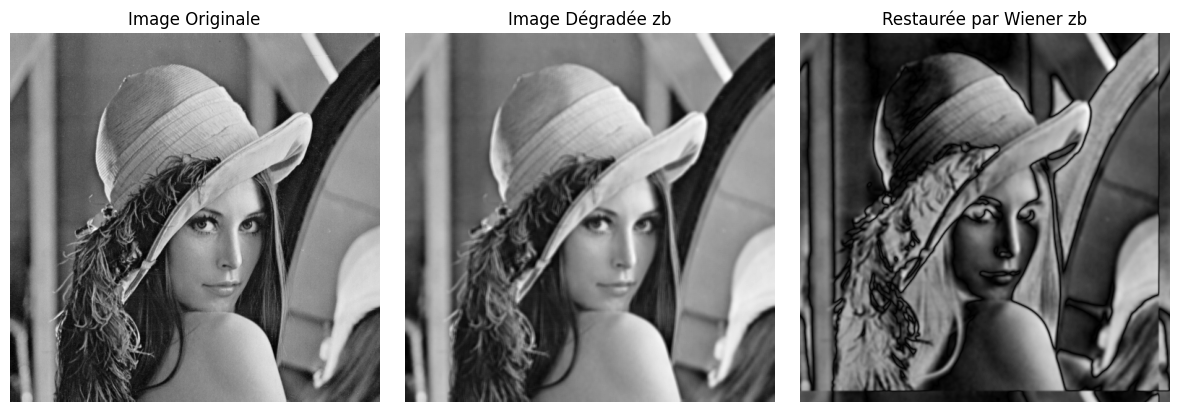

SNR(restaure_zb_wiener, original): -169.73 dB, PSNR(restaure_zb_wiener, original): 5.66 dB


In [19]:
# Application du filtre de Wiener aux observations floues
def appliquer_filtre_wiener(z, h, sigma_squared, y):
    G_wiener = filtre_deconv_wiener(h, sigma_squared, y)
    Z = np.fft.fft2(z)

    # Appliquer le filtre de Wiener
    estimated_y_freq = G_wiener * Z
    estimated_y = np.fft.ifft2(estimated_y_freq)

    return np.abs(estimated_y)

# Charger l'image originale de Lena
image = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

# Définir un noyau h pour la déconvolution (exemple d'un noyau gaussien)
kernel_size = 32
sigma = 1
x = np.linspace(-kernel_size//2, kernel_size//2, kernel_size)
y = np.linspace(-kernel_size//2, kernel_size//2, kernel_size)
x, y = np.meshgrid(x, y)
h = np.exp(-(x**2 + y**2) / (2*sigma**2))
h /= h.sum()  # Normaliser le noyau

# Définir la variance du bruit (exemple)
sigma_squared = 100000000 # Ajuster cette valeur selon nos besoins

# Appliquer le filtre de Wiener aux images dégradées
restaure_zb_wiener = appliquer_filtre_wiener(zb, h, sigma_squared, image)
# Calculer SNR et PSNR pour les images restaurées
snr_restaure_zb_wiener = snr(image, restaure_zb_wiener)
psnr_restaure_zb_wiener = psnr(image, restaure_zb_wiener)


# Afficher les résultats
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title("Image Originale")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Image Dégradée zb")
plt.imshow(zb, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Restaurée par Wiener zb")
plt.imshow(restaure_zb_wiener, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Afficher les performances
print(f"SNR(restaure_zb_wiener, original): {snr_restaure_zb_wiener:.2f} dB, PSNR(restaure_zb_wiener, original): {psnr_restaure_zb_wiener:.2f} dB")

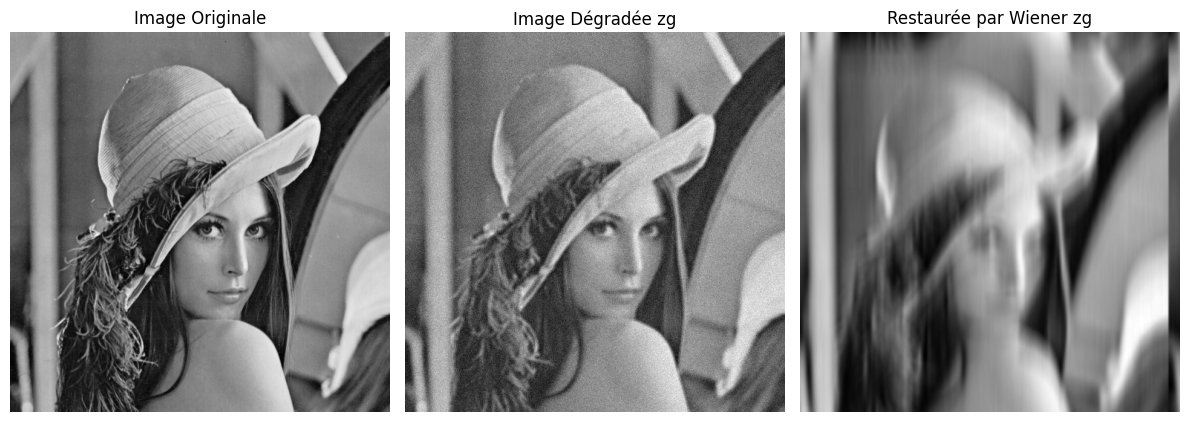

SNR(restaure_zg_wiener, original): -206.99 dB, PSNR(restaure_zg_wiener, original): 5.66 dB


In [15]:
# Définir un noyau h pour la déconvolution (exemple d'un noyau gaussien)
kernel_size = 32
sigma = 1
x = np.linspace(-kernel_size//2, kernel_size//2, kernel_size)
ord = np.linspace(-kernel_size//2, kernel_size//2, kernel_size)
x, y = np.meshgrid(x, y)
h = np.exp(-(x**2 + y**2) / (2*sigma**2))
h /= h.sum()  # Normaliser le noyau

# Définir la variance du bruit (exemple)
sigma_squared = 10000000000 # Ajuster cette valeur selon nos besoins



def psnr(xref, x):
    mse = np.mean((xref - x) ** 2)
    if mse == 0:
        return float('inf')  # Infinite PSNR when images are identical
    max_pixel = 255.0
    return 10 * np.log10((max_pixel ** 2) / mse)


restaure_zg_wiener = appliquer_filtre_wiener(zg, h, sigma_squared, image)
snr_restaure_zg_wiener = snr(image, restaure_zg_wiener)
psnr_restaure_zg_wiener = psnr(image, restaure_zg_wiener)



# Afficher les résultats pour zg
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Image Originale")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Image Dégradée zg")
plt.imshow(zg, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Restaurée par Wiener zg")
plt.imshow(restaure_zg_wiener, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Display results
print(f"SNR(restaure_zg_wiener, original): {snr_restaure_zg_wiener:.2f} dB, PSNR(restaure_zg_wiener, original): {psnr_restaure_zg_wiener:.2f} dB")